In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

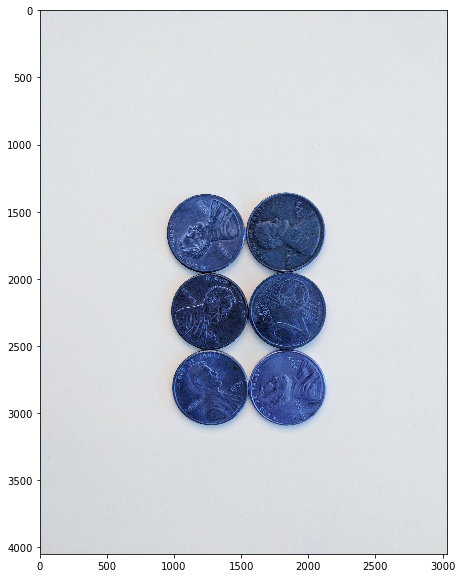

In [4]:
sep_coins = cv2.imread('CV_Python/DATA/pennies.jpg')
display(sep_coins)

In [5]:
# First apply teh median blur to blur the details (face on coin) of the coins
# Grayscale
# Binary Threshold
#FInd Contours

In [6]:
sep_blur = cv2.medianBlur(sep_coins,25)

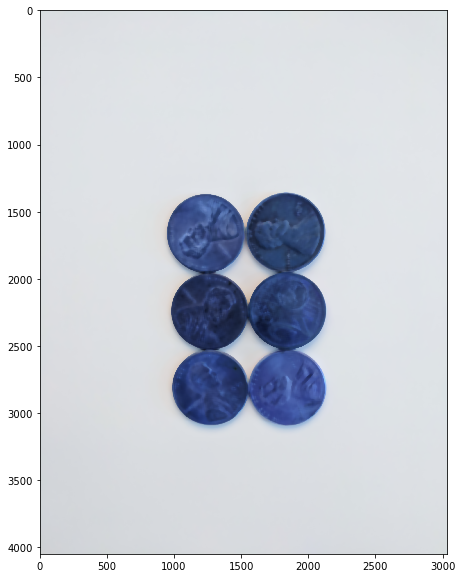

In [7]:
display(sep_blur)

In [8]:
gray_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

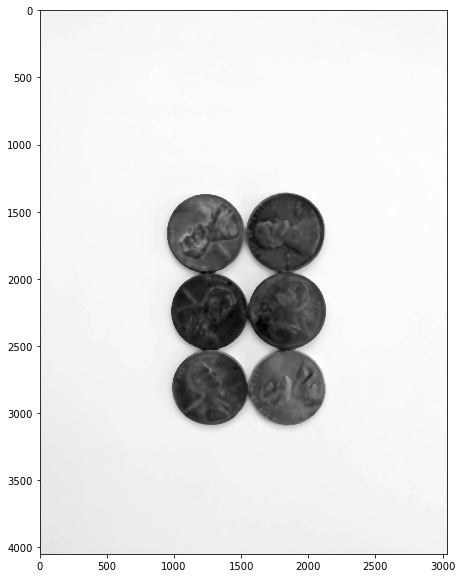

In [9]:
display(gray_coins)

In [10]:
ret,sep_thresh = cv2.threshold(gray_coins,150,255,cv2.THRESH_BINARY_INV)

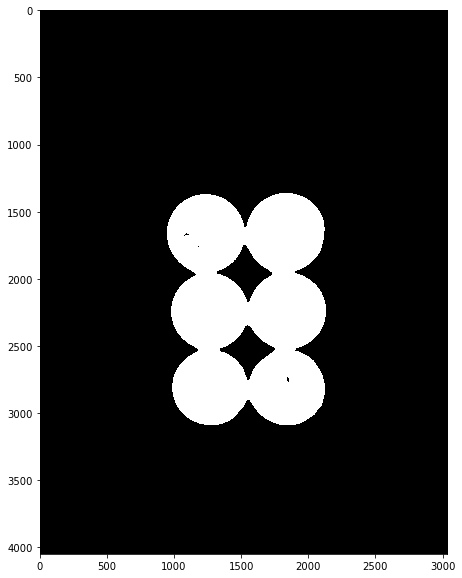

In [11]:
display(sep_thresh)

In [12]:
image,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [24]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == 1:
        cv2.drawContours(sep_coins,contours,i,(0,255,0),10)

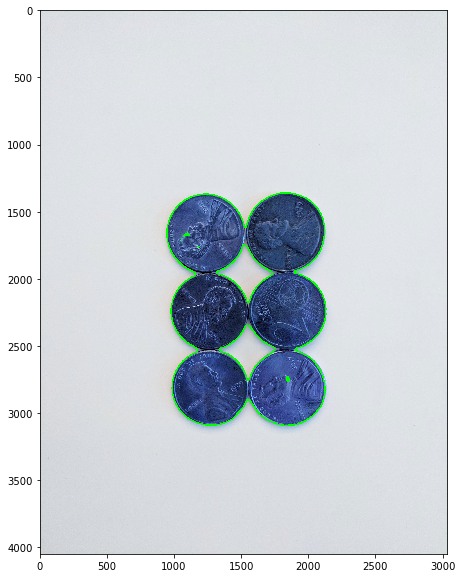

In [25]:
display(sep_coins)

In [26]:
img = cv2.imread('CV_Python/DATA/pennies.jpg')

In [27]:
img = cv2.medianBlur(img,35)

In [28]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [31]:
#ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#let's try the Otsu method
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

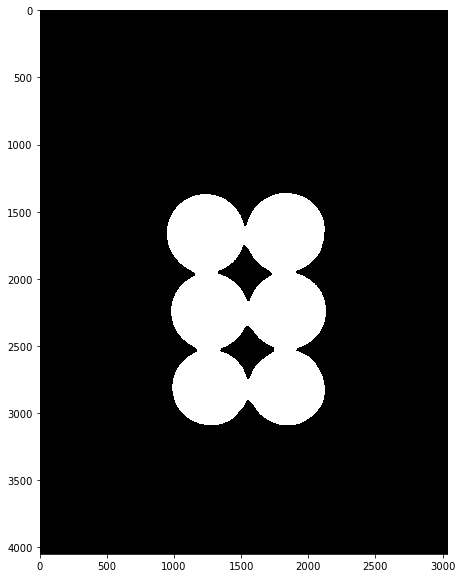

In [32]:
display(thresh)

In [33]:
#Noise Removal(Optional)
kernel = np.ones((3,3),np.uint8)

In [34]:
kernel


array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [36]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

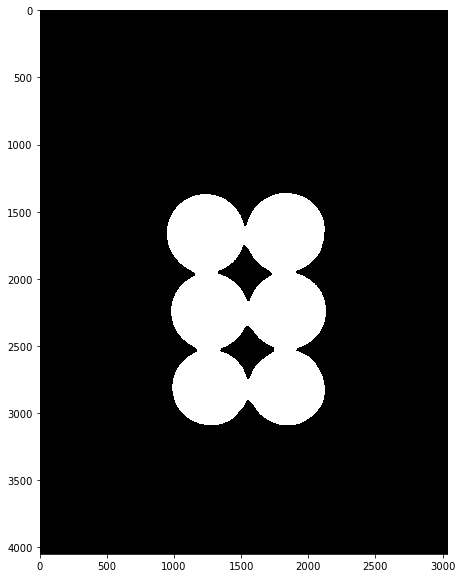

In [37]:
display(opening)

In [40]:
# Set seeds for each center of the circle in the image
# Using distance tranformation
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

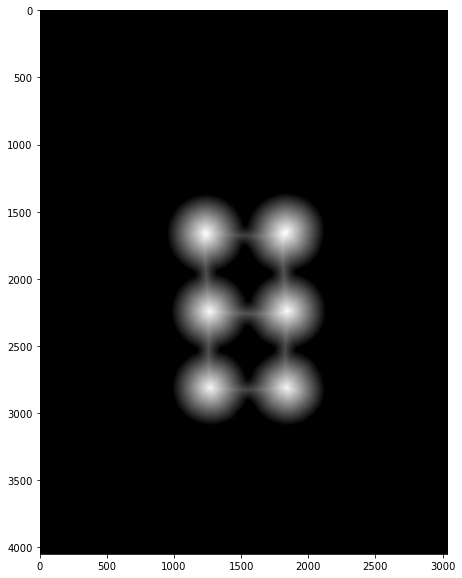

In [41]:
display(dist_transform)

In [42]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

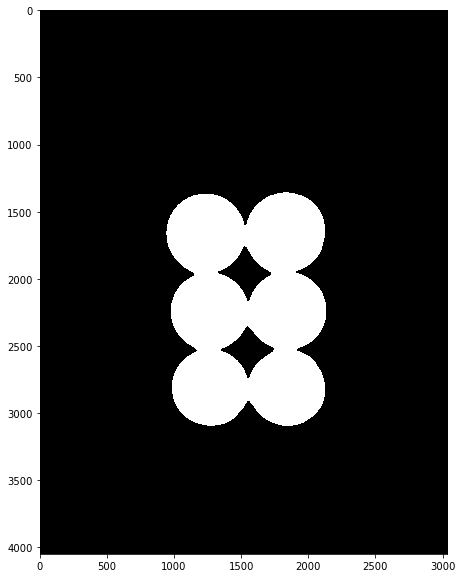

In [43]:
display(sure_bg)

In [44]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

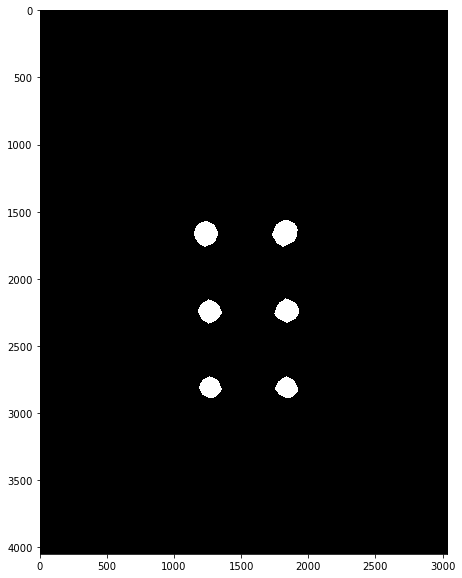

In [46]:
display(sure_fg)

In [47]:
sure_fg = np.uint8(sure_fg)

In [48]:
unknown = cv2.subtract(sure_bg,sure_fg)

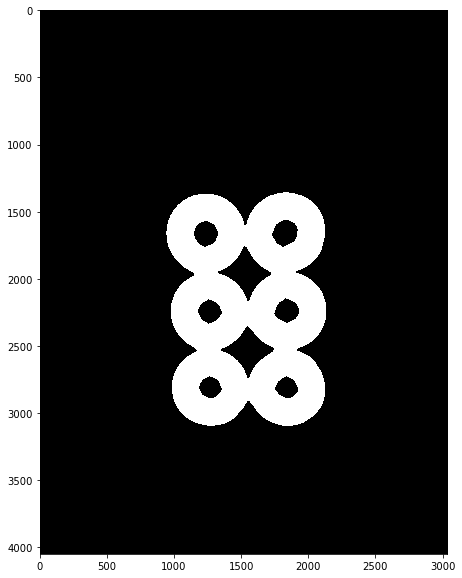

In [49]:
display(unknown)

In [50]:
ret,markers = cv2.connectedComponents(sure_fg)

In [52]:
markers = markers+1
markers[unknown==255] = 0

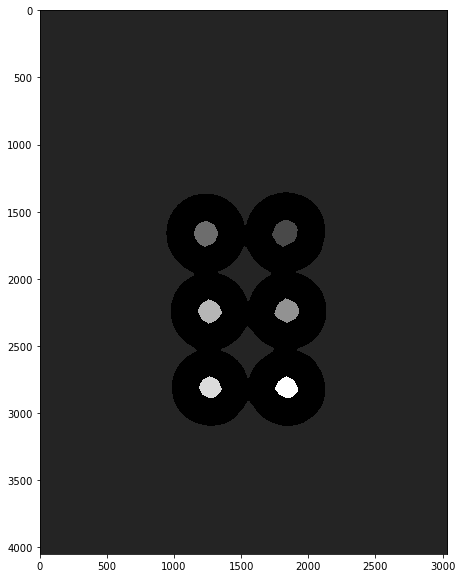

In [53]:
display(markers)

In [54]:
markers = cv2.watershed(img,markers)

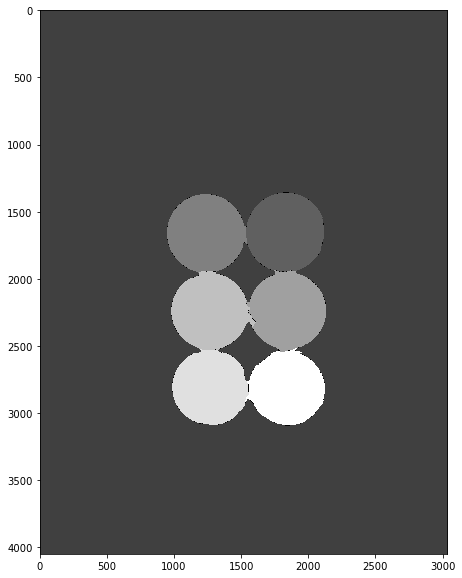

In [55]:
display(markers)

In [62]:
img,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(0,255,0),10)

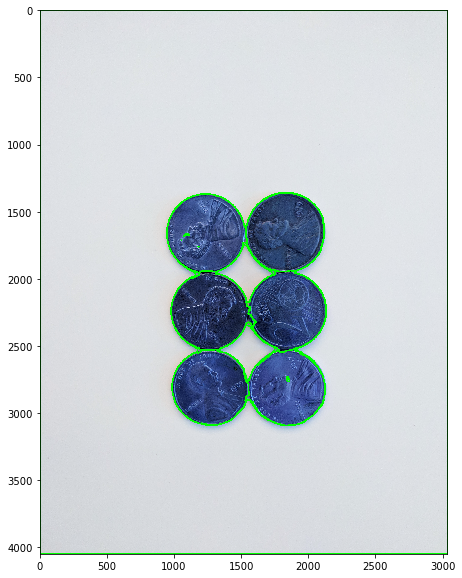

In [63]:
display(sep_coins)

In [ ]:
road = cv2.imread('CV_Python/DATA/road_image.jpg')

In [65]:
road_copy = np.copy(road)

In [66]:
road.shape

(600, 800, 3)

In [67]:
marker_img = np.zeros(road.shape[:2],dtype=np.uint32)

In [68]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [69]:
marker_img.shape

(600, 800)

In [70]:
segments.shape

(600, 800, 3)

In [71]:
from matplotlib import cm
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [74]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(0)[:3])*255)

colours = []
for i in range(10):
    colours.append(create_rgb(i))


In [75]:
colours

[(31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0)]

In [ ]:
###
# GLobal Variables
n_markers = 10 #0-9
current_marker = 1
#Mrkers updated watershed
marks_updates = False


#call back function
def mouse_callback(event,x,y,flags,params):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        #markers passed to the watershed algorithm
        cv2.cirlce(marker_img,(x,y),10,current_marker,-1)
        
        #user sees on the road image
        cv2.circle(road_copy,(x,y),10,colours[current_marker],-1)
        
        marks_updated


In [ ]:
#while true
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Road Image', road_copy)
    
    #close all windows
    
    k = cv2.waitKey(1)
    if k == 27:
        break
    
    #clearing all the colors upon pressig the C key
    elif k == ord('c'):
        road_copy = road.copy()
        marker_img = np.zeros(road.shape[:2],dtype=np.uint32)
        segments = np.zeros(road.shape,dtype=np.uint8)
    
    #update color choice
    elif k == 0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
    
    #update the markings
    
    if marks_updated:
        
        marker_img_copy = marker_img.copy()
        cv.watershed(road,marker_img_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ing in range(n_markers):
            #coloring segments, numpy call
            segments[marker_img_copy==(color_ind)] = colours(color_ind)
            
            
cv.destroyAllWindows()